# - 철도에서 사고가 났을 때 차종들간의 상관관계

In [3]:
import warnings

warnings.filterwarnings(action='ignore') 
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
Carcar = pd.read_excel('C:\\Users\\masterT\\Desktop\\시흥시프로젝트\\차대차-도로형태별 분석.xlsx')
Carcar

,single-way,intersection,railroad,car-car
0,1100,1152,0,1830
1,1053,1040,0,1735
2,1109,1096,0,1754
3,917,990,0,1483
4,909,989,0,1525
5,1143,1138,0,1791
6,1148,983,1,1703
7,1157,1017,0,1771
8,1178,1192,0,2014
9,1076,1148,0,1972


In [9]:
# X, Y 분할하기
Y = Carcar['car-car']
X = Carcar.drop(['car-car'], axis=1, inplace=False)

In [10]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [11]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [12]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [13]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [14]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 656.739, RMSE : 25.627
R^2(Variance score) : 0.984


In [15]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  -412.43152553625805
회귀 계수 값:  [0.7 1.3 0. ]


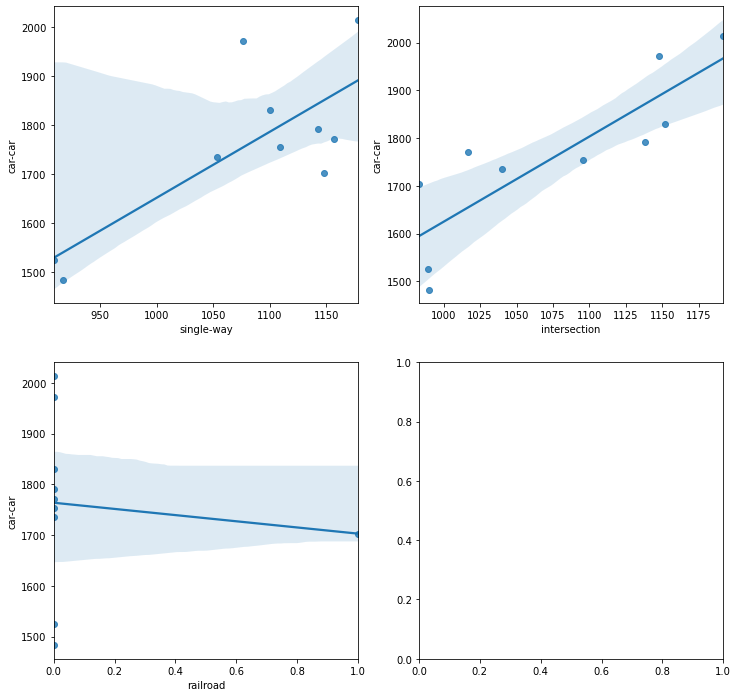

In [27]:
fig, axs = plt.subplots(figsize=(12, 12), ncols=2, nrows=2)

x_features = ['single-way', 'intersection', 'railroad']


for i, feature in enumerate(x_features):
      row = int(i/2)
      col = i%2
      sns.regplot(x=feature, y='car-car', data=Carcar, ax=axs[row][col])

In [17]:
import pandas as pd
from scipy import stats
from statsmodels.formula.api import ols, glm
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
Carcar_corr = Carcar.corr(method = 'pearson')
Carcar_corr

,single-way,intersection,railroad,car-car
single-way,1.000000,0.527762,0.254129,0.768035
intersection,0.527762,1.000000,-0.403881,0.849067
railroad,0.254129,-0.403881,1.000000,-0.115239
car-car,0.768035,0.849067,-0.115239,1.000000


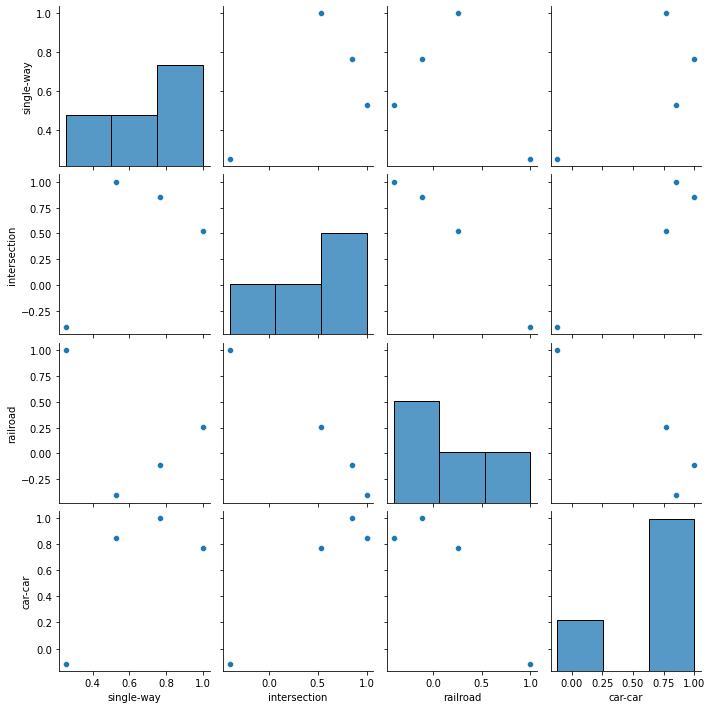

In [21]:
sns.pairplot(Carcar_corr)

In [24]:
heatmap_data = Carcar_corr[['single-way', 'intersection', 'railroad', 'car-car']]
colormap = plt.cm.RdBu

<AxesSubplot:>

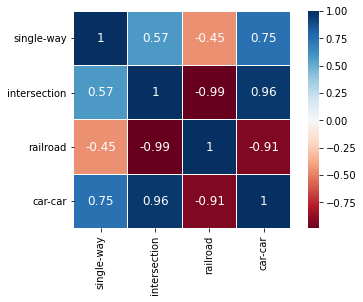

In [26]:
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':12})